In [17]:
# Importing Required Modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [18]:
#Reading the Santander Customer Satisfaction - TEST-Without TARGET.csv file

Test = pd.read_csv('../input/cis508-ass1/Santander Customer Satisfaction - TEST-Without TARGET.csv')
Test.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [19]:
#Reading the Santander Customer Satisfaction - TRAIN.csv file 

Train = pd.read_csv('../input/cis508-ass1/Santander Customer Satisfaction - TRAIN.csv')
Train.head(5)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979,0


0    73012
1     3008
Name: TARGET, dtype: int64


Text(0.5, 1.0, 'Distribution in target column before resmpling')

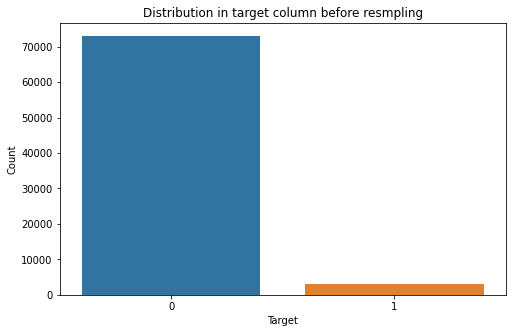

In [20]:
#Ploting the Train data as bar graph to view the percentage 0's and 1's

print(Train['TARGET'].value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = Train['TARGET'])
plt.xlabel('Target', size = 10)
plt.ylabel('Count', size = 10)
plt.title('Distribution in target column before resmpling', size = 12)

In [21]:
#To train the model I'm differentiating the coloumn it shiuld predict and placing it in Y_train
# The data except TARGET coloumn is X_Train
# We dont have TARGET coloumn in Test data so there is no need to divide the data the model will predict the TARGET coloumn

# # train = train.sample(frac=O.4)
X_train = Train.drop("TARGET", axis = 1)
Y_train = Train["TARGET"]
X_test = Test
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 56)
Y_train.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [22]:
# # Oversampling & Undersampling Y_train values in data to make Y_train = X_train

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train,Y_train)
Y_train.value_counts()

0    73012
1    73012
Name: TARGET, dtype: int64

In [23]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, min_samples_split=5)
clf.fit(X_train,Y_train)
# xgb_clf = XGBClassifier(n_estimators = 10, random_state = 156)
# xgb_clf.fit(X_train, Y_train, early_stopping_rounds = 100,eval_metric ='auc', eval_set = [(X_val, Y_val)]) 

text_rep = tree.export_text(clf)

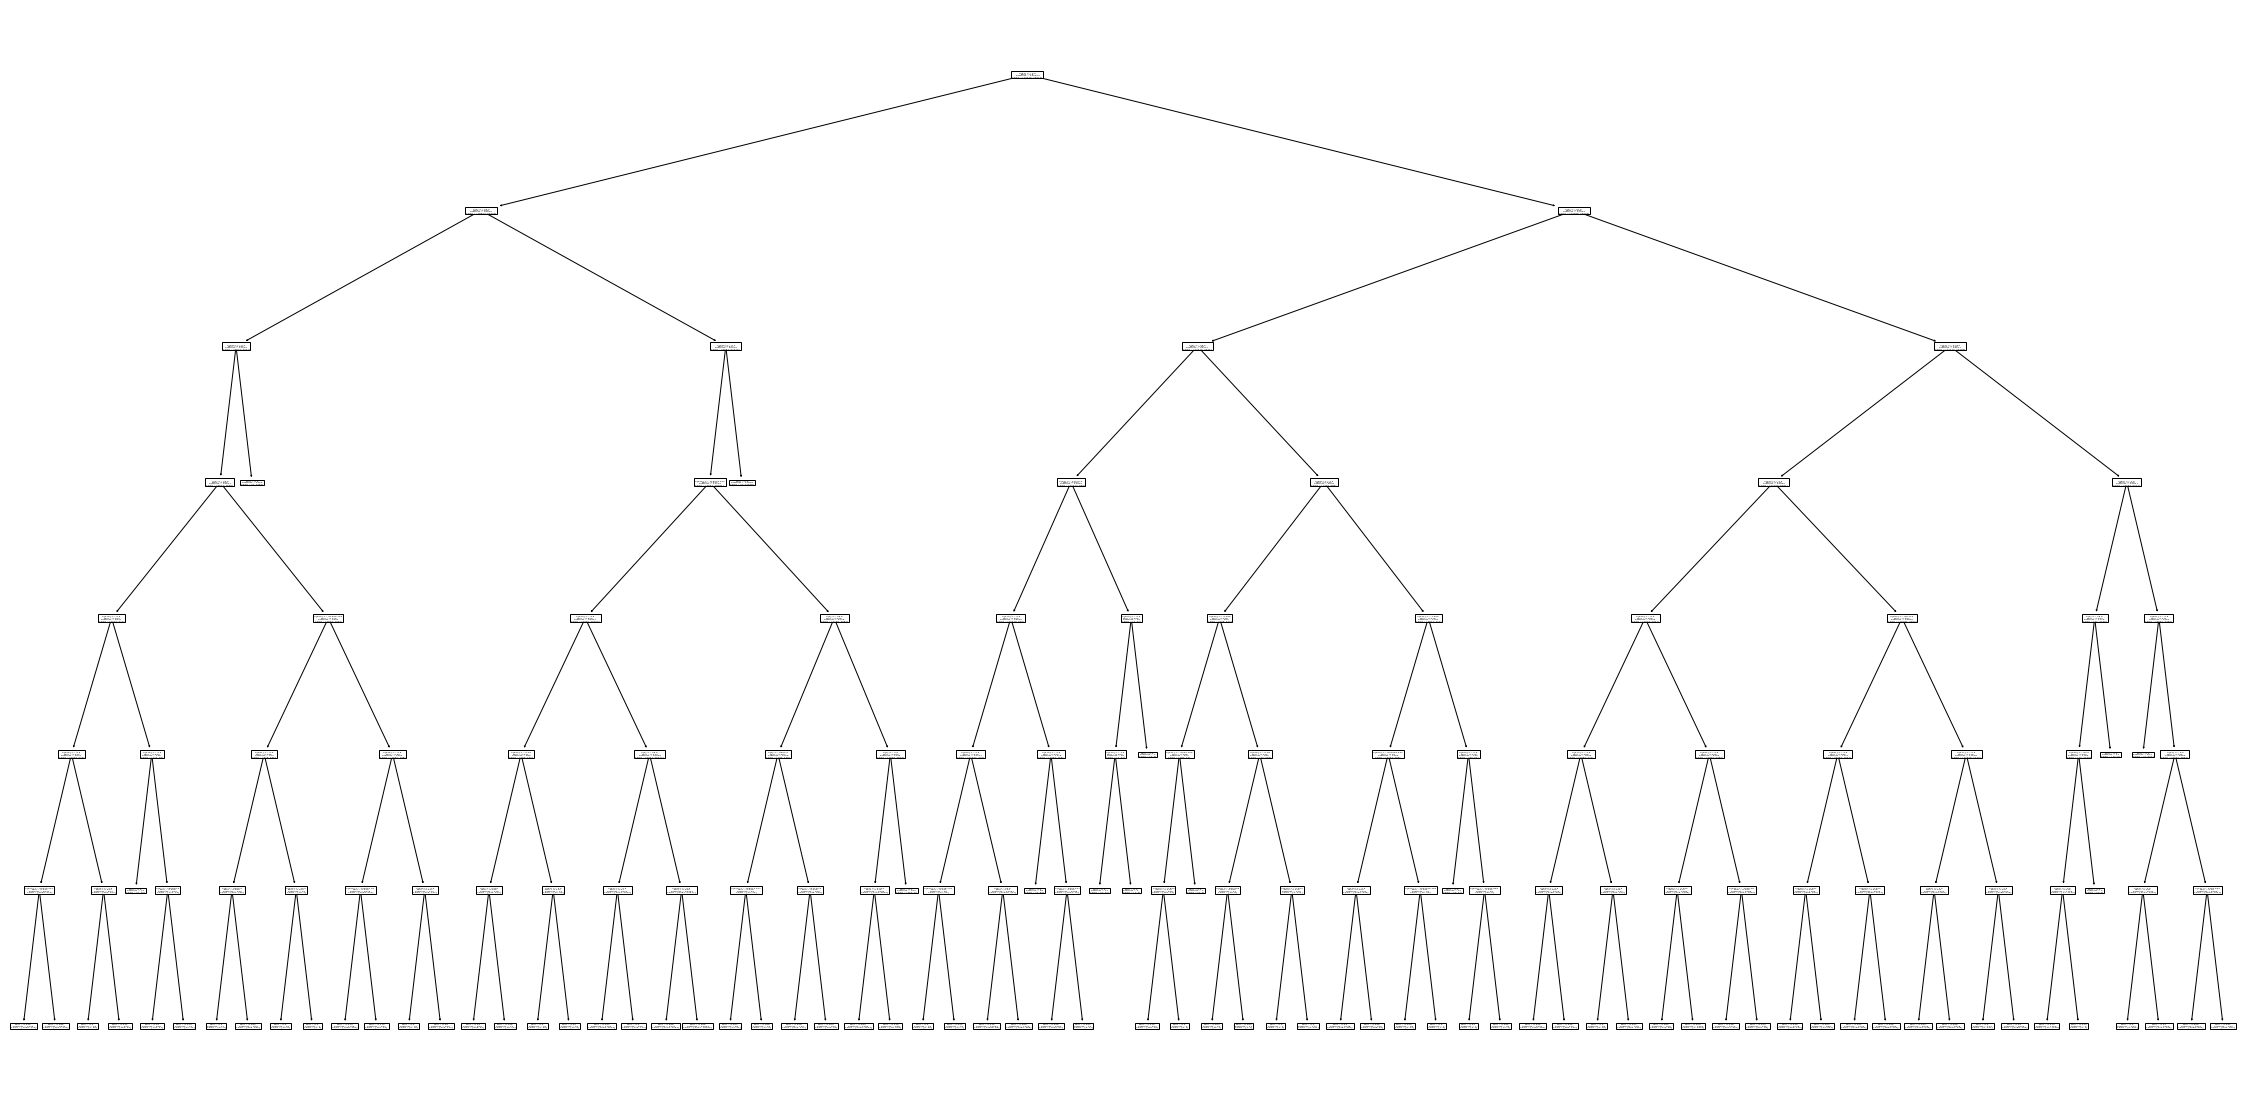

In [24]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf)

In [25]:
from sklearn.metrics import accuracy_score

pred_train = clf.predict(X_train)
print(accuracy_score(Y_train, pred_train))

0.8873541335670848


In [30]:
ID = Test['ID']
pred_test = clf.predict(X_test)
Output, counts = np.unique(pred_test, return_counts=True)
dict(zip(Output, counts))

{0: 65885, 1: 9933}

In [28]:
from numpy import asarray
from numpy import savetxt


# Output_Table = 
print(pred_test)
# np.save("Test_results", pred_test, allow_pickle=True, fix_imports=True)
savetxt('test_results_e.csv', pred_test, delimiter=',')

[0 0 0 ... 0 0 0]
